# Potato Disease Classification

### Import all the Dependencies

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [6]:
IMAGE_SIZE = 256
CHANNELS = 3

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 224  

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  
    rotation_range=10,
    horizontal_flip=True  
)

train_generator = train_datagen.flow_from_directory(
    r'D:\plant disease project\plant disease project\Training\dataset\train',  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size=32,  
    class_mode='sparse',  
    shuffle=True  
)


print("Class indices:", train_generator.class_indices)


Found 1506 images belonging to 3 classes.
Class indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [8]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[0.40943778 0.37806523 0.42904562]
  [0.41292    0.38154745 0.43252784]
  [0.40648052 0.37510797 0.42608836]
  ...
  [0.4379499  0.39089108 0.43010676]
  [0.44420674 0.39714792 0.4363636 ]
  [0.4504636  0.40340477 0.44262046]]

 [[0.40716252 0.37578997 0.42677036]
  [0.41576403 0.3843915  0.43537188]
  [0.4036365  0.37226394 0.42324433]
  ...
  [0.47823146 0.43117264 0.47038832]
  [0.47766262 0.4306038  0.4698195 ]
  [0.47709385 0.430035   0.4692507 ]]

 [[0.40488732 0.37351477 0.42449516]
  [0.41860807 0.3872355  0.4382159 ]
  [0.40079245 0.3694199  0.42040032]
  ...
  [0.47355887 0.42650005 0.46571574]
  [0.47014606 0.42308724 0.46230292]
  [0.46673325 0.4196744  0.4588901 ]]

 ...

 [[0.6429709  0.62728465 0.6821866 ]
  [0.6344389  0.6187526  0.67365456]
  [0.6259068  0.61022055 0.6651225 ]
  ...
  [0.595603   0.5720736  0.6191324 ]
  [0.6072433  0.5837139  0.6307727 ]
  [0.60784316 0.58431375 0.6313726 ]]

 [[0.6183615  0.6026752  0.65757716]
  [0.61722386 0.6015376  0.65643954]


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SIZE = 224  


validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  
    rotation_range=10,  
    horizontal_flip=True  
)


validation_generator = validation_datagen.flow_from_directory(
    r'D:\plant disease project\plant disease project\Training\dataset\val',  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size=32,  
    class_mode='sparse',  
    shuffle=False  
)


print("Validation class indices:", validation_generator.class_indices)


Found 215 images belonging to 3 classes.
Validation class indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SIZE = 224  


test_datagen = ImageDataGenerator(
    rescale=1.0 / 255  
)


test_generator = test_datagen.flow_from_directory(
    r'D:\plant disease project\plant disease project\Training\dataset\test',  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size=32, 
    class_mode='sparse', 
    shuffle=False 
)


print("Test class indices:", test_generator.class_indices)


Found 431 images belonging to 3 classes.
Test class indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [13]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.73333335 0.7254902  0.7803922 ]
  [0.7372549  0.7294118  0.7843138 ]
  [0.7372549  0.7294118  0.7843138 ]
  ...
  [0.7725491  0.7686275  0.8235295 ]
  [0.76470596 0.7607844  0.81568635]
  [0.75294125 0.7490196  0.80392164]]

 [[0.7490196  0.7411765  0.7960785 ]
  [0.74509805 0.7372549  0.79215693]
  [0.73333335 0.7254902  0.7803922 ]
  ...
  [0.7411765  0.7372549  0.79215693]
  [0.73333335 0.7294118  0.7843138 ]
  [0.7294118  0.7254902  0.7803922 ]]

 [[0.6901961  0.68235296 0.7372549 ]
  [0.6901961  0.68235296 0.7372549 ]
  [0.6901961  0.68235296 0.7372549 ]
  ...
  [0.7254902  0.72156864 0.77647066]
  [0.72156864 0.7176471  0.7725491 ]
  [0.7254902  0.72156864 0.77647066]]

 ...

 [[0.49803925 0.47058827 0.53333336]
  [0.46274513 0.43529415 0.49803925]
  [0.5254902  0.49803925 0.56078434]
  ...
  [0.43921572 0.42352945 0.48235297]
  [0.5294118  0.5137255  0.57254905]
  [0.6039216  0.5882353  0.64705884]]

 [[0.41176474 0.38431376 0.44705886]
  [0.5019608  0.47450984 0.5372549 ]


## Building the Model

In [14]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
1506/32

47.0625

In [18]:
215/32

6.71875

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 884ms/step - accuracy: 0.4718 - loss: 0.9585 - val_accuracy: 0.5365 - val_loss: 0.7953
Epoch 2/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 24s 538ms/step - accuracy: 0.2500 - loss: 1.0160

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2500 - loss: 1.0160 - val_accuracy: 0.0870 - val_loss: 1.4815
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 769ms/step - accuracy: 0.5746 - loss: 0.8779 - val_accuracy: 0.6875 - val_loss: 0.6649
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.6192 - val_accuracy: 0.2609 - val_loss: 1.3996
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 688ms/step - accuracy: 0.6794 - loss: 0.6844 - val_accuracy: 0.8021 - val_loss: 0.5552
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 2.0905 - val_accuracy: 0.3478 - val_loss: 0.8407
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 708ms/step - accuracy: 0.7943 - loss: 0.5099 - val_accuracy: 0.7865 - val_loss: 0.4849
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2854 - val_accuracy: 0.4783 - val_loss: 0.9934
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 689ms/step - accuracy: 0.8403 - loss: 0.4044 - val_accuracy: 0.8542 - val_loss

In [20]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.9887 - loss: 0.0556


In [21]:
scores

[0.10173963010311127, 0.9767981171607971]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [22]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [23]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [25]:
type(history.history['loss'])

list

In [26]:
len(history.history['loss'])

50

In [27]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9142237305641174,
 1.0160003900527954,
 0.8573035597801208,
 0.6192147731781006,
 0.6442745923995972]

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [29]:
val_acc

[0.5364583134651184,
 0.08695652335882187,
 0.6875,
 0.260869562625885,
 0.8020833134651184,
 0.3478260934352875,
 0.7864583134651184,
 0.47826087474823,
 0.8541666865348816,
 0.8695651888847351,
 0.8177083134651184,
 0.8695651888847351,
 0.8072916865348816,
 0.9130434989929199,
 0.9010416865348816,
 0.782608687877655,
 0.921875,
 0.95652174949646,
 0.9270833134651184,
 0.95652174949646,
 0.84375,
 0.8695651888847351,
 0.953125,
 0.95652174949646,
 0.9635416865348816,
 0.9130434989929199,
 0.90625,
 1.0,
 0.953125,
 0.95652174949646,
 0.9739583134651184,
 0.95652174949646,
 0.9479166865348816,
 0.95652174949646,
 0.9739583134651184,
 0.782608687877655,
 0.9739583134651184,
 0.95652174949646,
 0.9479166865348816,
 0.95652174949646,
 0.9739583134651184,
 0.8695651888847351,
 0.984375,
 0.95652174949646,
 0.9583333134651184,
 0.95652174949646,
 0.9895833134651184,
 0.95652174949646,
 0.9791666865348816,
 1.0]

In [30]:
acc

[0.49728628993034363,
 0.25,
 0.5590230822563171,
 0.6875,
 0.7081117033958435,
 0.5,
 0.8032564520835876,
 0.90625,
 0.8473541140556335,
 0.84375,
 0.885345995426178,
 0.875,
 0.8371777534484863,
 0.71875,
 0.8860244154930115,
 0.9375,
 0.9090909361839294,
 0.9375,
 0.9280868172645569,
 0.90625,
 0.9226594567298889,
 0.78125,
 0.9240162968635559,
 0.84375,
 0.9545454382896423,
 1.0,
 0.9077340364456177,
 0.90625,
 0.9450474977493286,
 0.90625,
 0.9694707989692688,
 1.0,
 0.9701492786407471,
 1.0,
 0.9687923789024353,
 0.96875,
 0.9626865386962891,
 1.0,
 0.9769335389137268,
 0.96875,
 0.9721845388412476,
 0.9375,
 0.9782903790473938,
 1.0,
 0.9803256392478943,
 0.90625,
 0.989823579788208,
 1.0,
 0.9721845388412476,
 1.0]

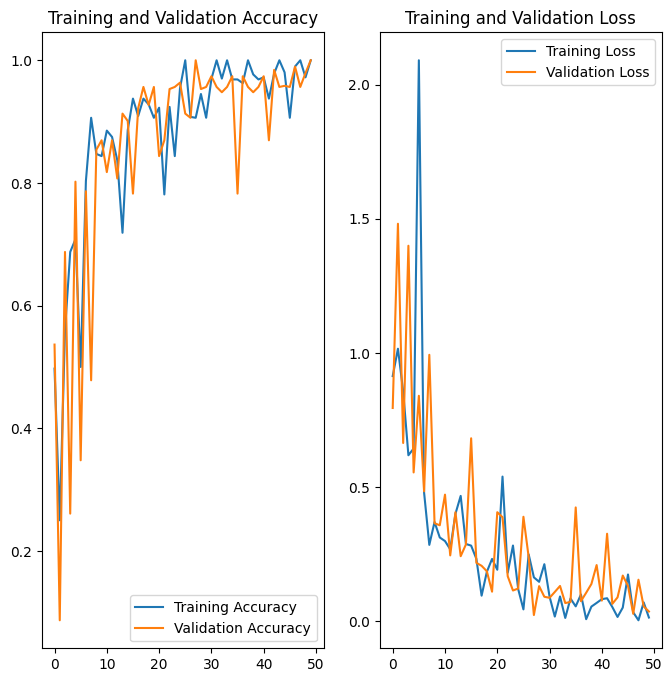

In [31]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
predicted label: Potato___Early_blight


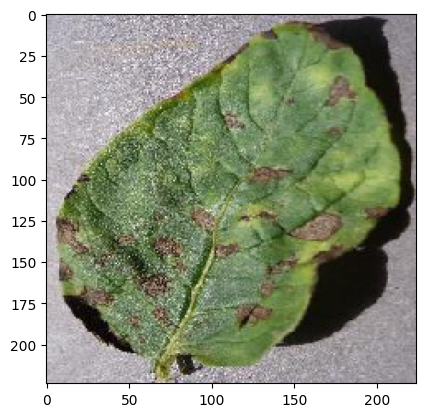

In [32]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


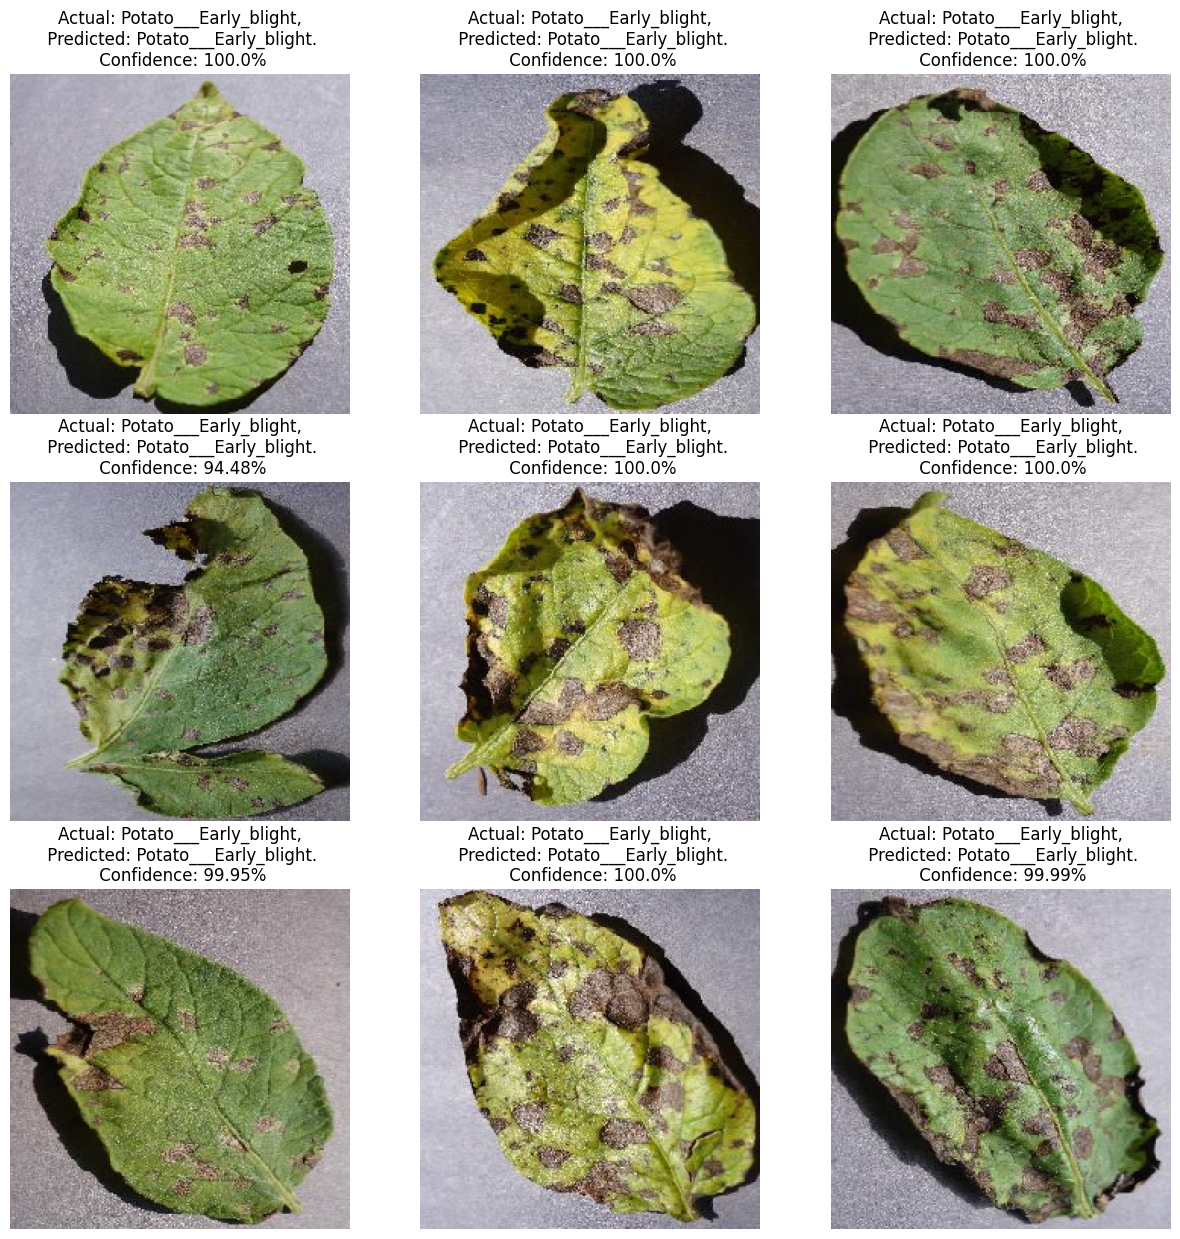

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [35]:
model.save(r"D:\plant disease project\plant disease project\models\final11.keras")

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step


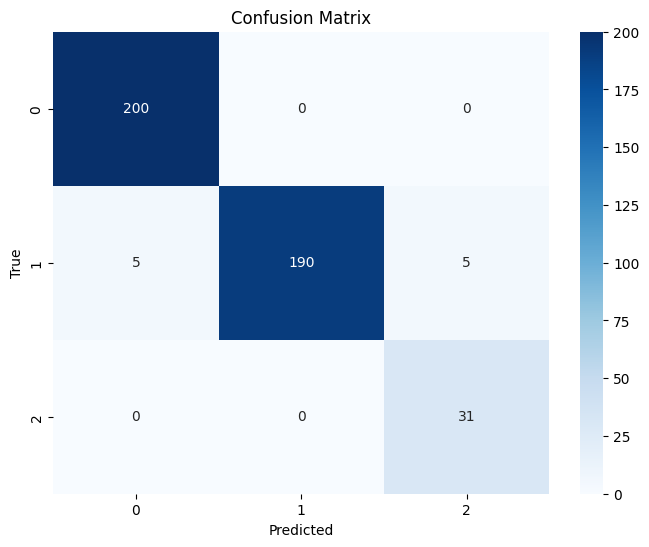

Model Accuracy: 0.9767981438515081
Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       0.98      1.00      0.99       200
 Potato___Late_blight       1.00      0.95      0.97       200
     Potato___healthy       0.86      1.00      0.93        31

             accuracy                           0.98       431
            macro avg       0.95      0.98      0.96       431
         weighted avg       0.98      0.98      0.98       431



In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Extract predicted class labels

y_true = test_generator.classes  # Get true class labels

# Calculate model accuracy
accuracy = accuracy_score(y_true, y_pred)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print model accuracy and classification report
print('Model Accuracy:', accuracy)
print('Classification Report:')
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))